### 1. Get Train \& Test Data

In [105]:
import os 
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []
path7 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('epidural/brain_bone_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraparenchymal/brain_bone_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraventricular/brain_bone_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('multi/brain_bone_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('normal/brain_bone_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('subarachnoid/brain_bone_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

for dirname, _, filenames in os.walk('subdural/brain_bone_window'):
    for filename in filenames:
        path7.append(os.path.join(dirname, filename))  
    print("Number of type 6: ", len(filenames))

Number of type 0:  1694
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  10700
Number of type 5:  16423
Number of type 6:  32200


In [106]:
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3],[4],[5], [6]])

OneHotEncoder()

In [107]:
import random


data = []
result = []

for path in path1:
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(0)
        
for path in path2:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(1) 
        
for path in path3:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(2)
        
for path in path4:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(3)

for path in path5:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(4)
        
for path in path6:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(5)

for path in path7:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(6)

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.4)]
train_result = shuffled_result[0:int(length*0.4)]

test_data = shuffled_data[int(length*0.4):int(length*0.5)]
test_result = shuffled_result[int(length*0.4):int(length*0.5)] # FIXME: trying to reduce data so calling fit() doesn't take forever

In [108]:
test_data = np.array(test_data)
test_data.shape

test_result = np.array(test_result)
test_result.shape

(11863,)

In [109]:
train_data = np.array(train_data)
test_data.shape

train_result = np.array(train_result)
train_result.shape

(47453,)

In [110]:
# Confirm shape of data 
print("train data: ", train_data.shape)
print("test data: ", test_data.shape)
print("train data after reshape: ", train_data.reshape(-1,128*128).shape)
print("test data after reshape: ", test_data.reshape(-1,128*128).shape)

train data:  (47453, 128, 128)
test data:  (11863, 128, 128)
train data after reshape:  (47453, 16384)
test data after reshape:  (11863, 16384)


### 2. Build the Neural Network


In [111]:
X_valid, X_train = train_data[:5000] / 255., train_data[5000:] / 255.
y_valid, y_train = train_result[:5000], train_result[5000:]
X_test = test_data / 255.
y_test = test_result / 255.
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(42453, 128, 128) (5000, 128, 128) (11863, 128, 128)
(42453,) (5000,) (11863,)


In [112]:
print(y_train.reshape(42453,-1).reshape(42453, -1).shape)

(42453, 1)


In [113]:
y_train

array([6, 1, 3, ..., 0, 5, 6])

In [114]:
class_names = ["0", "1", "2", "3", "4", "5", "6"]

In [115]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128, 128]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

In [116]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 300)               4915500   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,946,610
Trainable params: 4,946,610
Non-trainable params: 0
_________________________________________________________________


In [117]:
weights, biases = model.layers[1].get_weights()

weights

array([[ 0.00624145, -0.00223747, -0.00557982, ..., -0.00705057,
         0.00983666, -0.01756085],
       [ 0.0012146 , -0.00791551, -0.01495419, ...,  0.00153694,
        -0.00704478, -0.01061738],
       [-0.01577629, -0.01759288,  0.01810366, ..., -0.01080306,
         0.01815253, -0.01868817],
       ...,
       [ 0.00372475,  0.01591296, -0.00610253, ...,  0.00645785,
        -0.00081756,  0.00928183],
       [ 0.00682121, -0.0023047 , -0.00090442, ...,  0.01544421,
         0.01161724,  0.00345435],
       [-0.00477747, -0.00085977,  0.00936946, ...,  0.01443502,
        -0.0025459 , -0.0019555 ]], dtype=float32)

In [118]:
weights.shape

(16384, 300)

In [119]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [120]:
biases.shape

(300,)

In [121]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 3. Training the Neural Network model

In [122]:
# training the model and saving metrics in history
# minibatch
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
332/332 [==============================] - 13s 37ms/step - loss: 1.7016 - accuracy: 0.3181 - val_loss: 1.6654 - val_accuracy: 0.3252
Epoch 2/30
332/332 [==============================] - 7s 22ms/step - loss: 1.6528 - accuracy: 0.3414 - val_loss: 1.6437 - val_accuracy: 0.3356
Epoch 3/30
332/332 [==============================] - 7s 22ms/step - loss: 1.6338 - accuracy: 0.3505 - val_loss: 1.6702 - val_accuracy: 0.3144
Epoch 4/30
332/332 [==============================] - 7s 21ms/step - loss: 1.6193 - accuracy: 0.3608 - val_loss: 1.6250 - val_accuracy: 0.3612
Epoch 5/30
332/332 [==============================] - 7s 22ms/step - loss: 1.6073 - accuracy: 0.3627 - val_loss: 1.6514 - val_accuracy: 0.3140
Epoch 6/30
332/332 [==============================] - 7s 20ms/step - loss: 1.5988 - accuracy: 0.3677 - val_loss: 1.6069 - val_accuracy: 0.3666
Epoch 7/30
332/332 [==============================] - 7s 21ms/step - loss: 1.5893 - accuracy: 0.3726 - val_loss: 1.6354 - val_accuracy: 0.345

In [123]:
#stochastic gradient decent
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1327/1327 [==============================] - 23s 18ms/step - loss: 1.4978 - accuracy: 0.4150 - val_loss: 1.6095 - val_accuracy: 0.3544
Epoch 2/30
1327/1327 [==============================] - 16s 12ms/step - loss: 1.4657 - accuracy: 0.4299 - val_loss: 1.5955 - val_accuracy: 0.3740
Epoch 3/30
1327/1327 [==============================] - 19s 14ms/step - loss: 1.4404 - accuracy: 0.4396 - val_loss: 1.6380 - val_accuracy: 0.3310
Epoch 4/30
1327/1327 [==============================] - 16s 12ms/step - loss: 1.4185 - accuracy: 0.4525 - val_loss: 1.5676 - val_accuracy: 0.3894
Epoch 5/30
1327/1327 [==============================] - 16s 12ms/step - loss: 1.3961 - accuracy: 0.4630 - val_loss: 1.7471 - val_accuracy: 0.3274
Epoch 6/30
1327/1327 [==============================] - 17s 13ms/step - loss: 1.3746 - accuracy: 0.4717 - val_loss: 1.5697 - val_accuracy: 0.3892
Epoch 7/30
1327/1327 [==============================] - 16s 12ms/step - loss: 1.3516 - accuracy: 0.4806 - val_loss: 1.6153 -

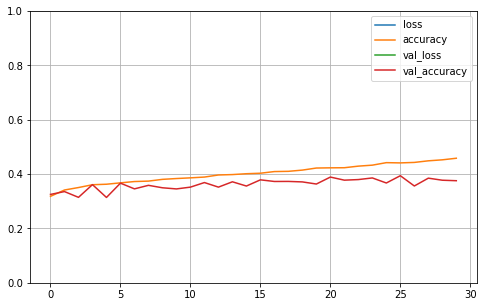

In [124]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

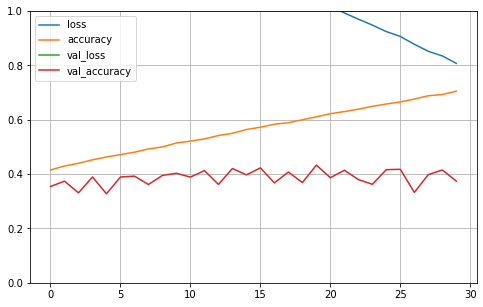

In [125]:
pd.DataFrame(historysgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

In [126]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.02, 0.  , 0.01, 0.27, 0.67, 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.22, 0.33, 0.16, 0.03, 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.  , 0.62, 0.03, 0.25, 0.08, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [127]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([5, 3, 3])

In [128]:
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new

array([0.00392157, 0.02352941, 0.02352941])

In [129]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [130]:
#clear the section
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [131]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [132]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1327/1327 [==============================] - 22s 16ms/step - loss: 1.7434 - accuracy: 0.3006 - val_loss: 1.7051 - val_accuracy: 0.3144


Text(0, 0.5, 'Loss')

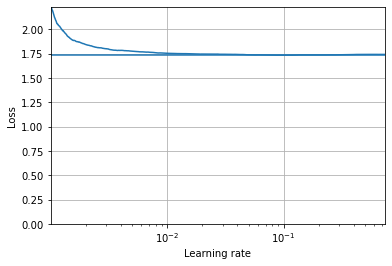

In [133]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [134]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [135]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])

/Users/maxleroux/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [136]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#The model needs to be recalled each time.

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1327/1327 [==============================] - 25s 18ms/step - loss: 3.5515 - accuracy: 0.2804 - val_loss: 1.7026 - val_accuracy: 0.2920
Epoch 2/100
1327/1327 [==============================] - 17s 13ms/step - loss: 1.7760 - accuracy: 0.3021 - val_loss: 1.7071 - val_accuracy: 0.2882
Epoch 3/100
1327/1327 [==============================] - 18s 13ms/step - loss: 1.7073 - accuracy: 0.2921 - val_loss: 1.6949 - val_accuracy: 0.2834
Epoch 4/100
1327/1327 [==============================] - 19s 14ms/step - loss: 1.6807 - accuracy: 0.3153 - val_loss: 1.6627 - val_accuracy: 0.3252
Epoch 5/100
1327/1327 [==============================] - 22s 17ms/step - loss: 1.6692 - accuracy: 0.3244 - val_loss: 1.6502 - val_accuracy: 0.2920
Epoch 6/100
1327/1327 [==============================] - 19s 14ms/step - loss: 1.6690 - accuracy: 0.3191 - val_loss: 1.6580 - val_accuracy: 0.3172
Epoch 7/100
1327/1327 [==============================] - 19s 14ms/step - loss: 1.6545 - accuracy: 0.3356 - val_loss: 1

In [137]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

1327/1327 [==============================] - 10s 7ms/step - loss: 1.5727 - accuracy: 0.3790


[1.5726678371429443, 0.37900736927986145]

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/Users/maxleroux/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1327/1327 [==============================] - 11s 8ms/step - loss: 4.0772 - val_loss: 3.2682
Epoch 2/20
1327/1327 [==============================] - 6s 5ms/step - loss: 3.1932 - val_loss: 3.2507
Epoch 3/20
1327/1327 [==============================] - 5s 3ms/step - loss: 3.1856 - val_loss: 3.2467
Epoch 4/20
1327/1327 [==============================] - 8s 6ms/step - loss: 3.1829 - val_loss: 3.2443
Epoch 5/20
1327/1327 [==============================] - 8s 6ms/step - loss: 3.1803 - val_loss: 3.2454
Epoch 6/20
1327/1327 [==============================] - 6s 5ms/step - loss: 3.1801 - val_loss: 3.2423
Epoch 7/20
1327/1327 [==============================] - 8s 6ms/step - loss: 3.1796 - val_loss: 3.2417
Epoch 8/20
1327/1327 [==============================] - 7s 5ms/step - loss: 3.1786 - val_loss: 3.2476
Epoch 9/20
1327/1327 [==============================] - 7s 5ms/step - loss: 3.1776 - val_loss: 3.2413
Epoch 10/20
1327/1327 [==============================] - 6s 4ms/step - loss: 3.17

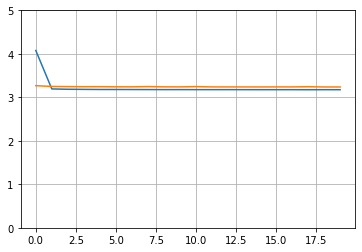

In [146]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()